# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user --no-warn-script-location

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Connect Colab notebook to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3. Advanced Machine Learning/BankChurners.csv")

# Display basic information about the dataset
print(data.info())

# Show the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Overview

- Observations
- Sanity checks

Missing Values:
 CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Number of duplicate rows: 0

Unique values in Attrition_Flag:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Statistical Summary of Numerical Features:
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  

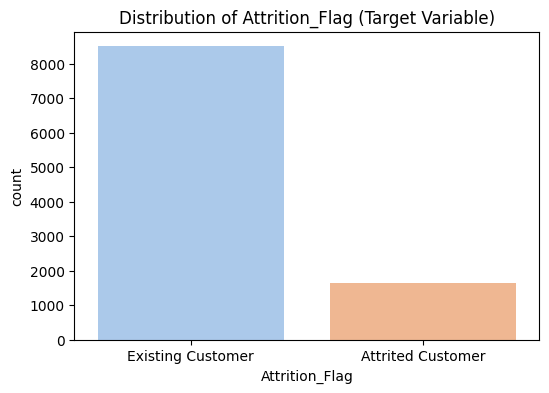


Checking the relationship (sanity check) between Avg_Open_To_Buy, Credit_Limit, and Avg_Utilization_Ratio:
Any inconsistencies found? True


In [ ]:
# Basic library imports
import warnings
warnings.filterwarnings("ignore")

# Library imports for dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Checking for missing values
print("Missing Values:\n", data.isnull().sum())

# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Checking the unique values for the target variable
print("\nUnique values in Attrition_Flag:")
print(data['Attrition_Flag'].value_counts())

# Displaying basic statistics for numerical features
print("\nStatistical Summary of Numerical Features:")
print(data.describe())

# Checking for categorical features and their unique values
print("\nCategorical Features and Unique Values:")
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].nunique()} unique values")

# Checking the balance of the target class
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition_Flag', palette='pastel')
plt.title('Distribution of Attrition_Flag (Target Variable)')
plt.show()

# Checking the relationship between Avg_Open_To_Buy, Credit_Limit, and Avg_Utilization_Ratio
print("\nChecking the relationship (sanity check) between Avg_Open_To_Buy, Credit_Limit, and Avg_Utilization_Ratio:")
relation_check = (
    (data['Avg_Open_To_Buy'] / data['Credit_Limit']) + data['Avg_Utilization_Ratio']
)
print(f"Any inconsistencies found? {any(relation_check != 1)}")

### Observations

1.	Missing Values:
	•	Checking if there are any missing values in the dataset.
2.	Duplicate Rows:
	•	Ensuring the dataset does not have any duplicate records that may skew the analysis.
3.	Unique Values in Target Variable:
	•	Verifying the Attrition_Flag target variable to ensure it is correctly populated and identifying if it’s imbalanced.
4.	Basic Statistical Summary:
	•	Getting an idea about the range, mean, and spread of the numerical variables to catch any outliers or incorrect data entries.
5.	Categorical Features and Unique Values:
	•	This helps us understand the diversity in categorical data and if any features need encoding or treatment.
6.	Class Balance Check:
	•	A visual inspection to check if the target classes are balanced. If not, techniques like SMOTE or class weights might be necessary during modeling.
7.	Sanity Check on Key Relationships:
	•	As per the description:
 \frac{\text{Avg_Open_To_Buy}}{\text{Credit_Limit}} + \text{Avg_Utilization_Ratio} = 1

This relationship is validated to ensure data consistency.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

In [ ]:
# Function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

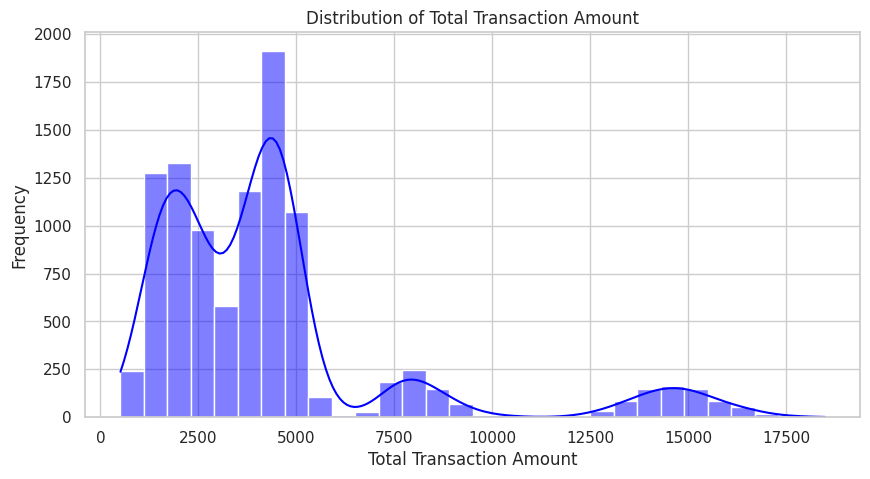

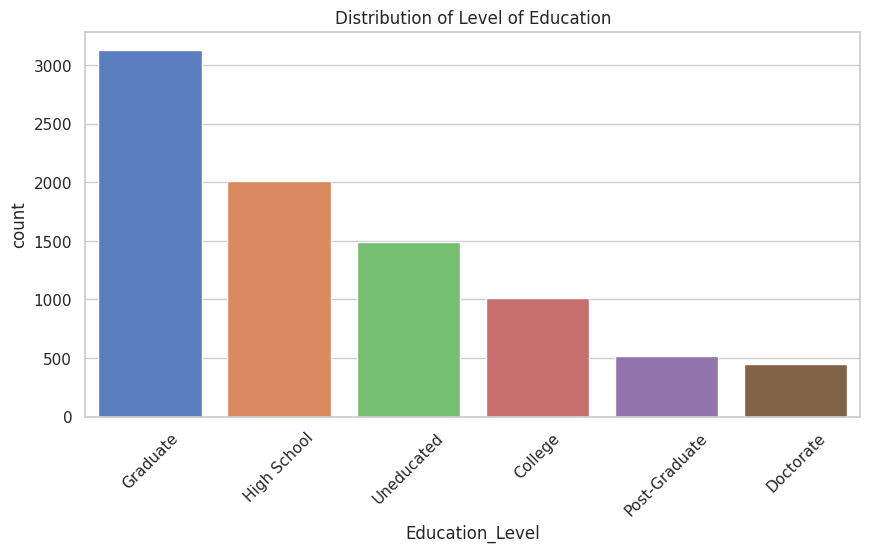

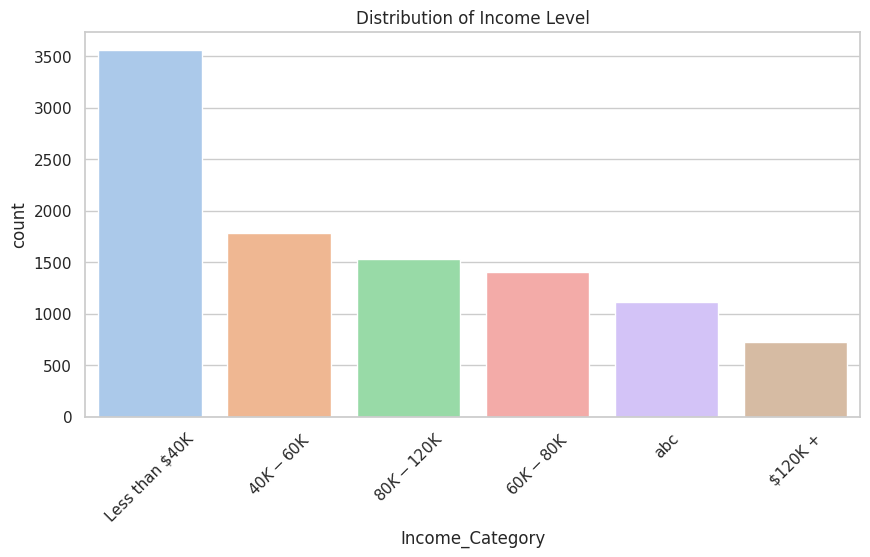

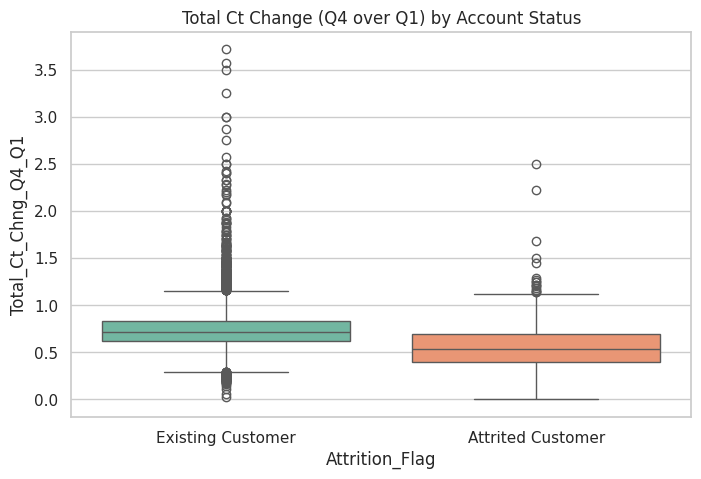

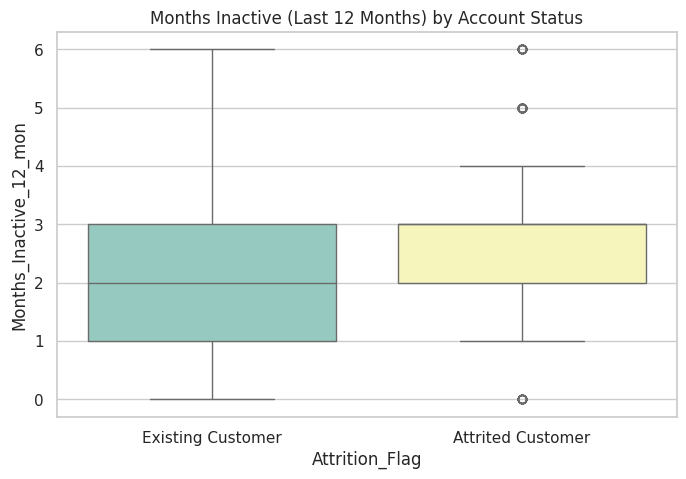

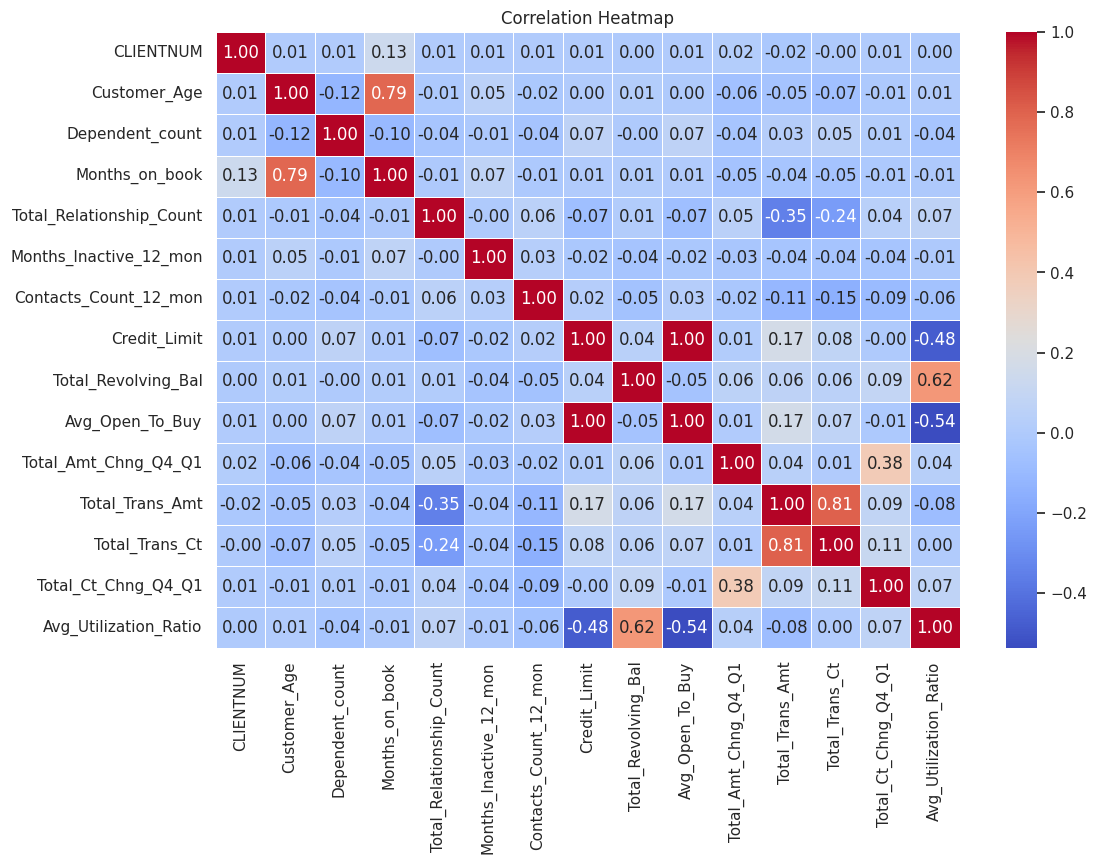

In [ ]:
# Set a consistent style for plots
sns.set(style='whitegrid')

# Distribution of Total Transaction Amount
plt.figure(figsize=(10, 5))
sns.histplot(data['Total_Trans_Amt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()
print()

# Distribution of Level of Education
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Education_Level', palette='muted', order=data['Education_Level'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Level of Education')
plt.show()
print()

# Distribution of Income Level
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Income_Category', palette='pastel', order=data['Income_Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Income Level')
plt.show()
print()

# Variation of Total Ct Change Q4_Q1 by Account Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', palette='Set2')
plt.title('Total Ct Change (Q4 over Q1) by Account Status')
plt.show()
print()

# Variation of Months Inactive in Last 12 Months by Account Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition_Flag', y='Months_Inactive_12_mon', palette='Set3')
plt.title('Months Inactive (Last 12 Months) by Account Status')
plt.show()
print()

# Correlation Heatmap - Exclude non-numeric columns
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
print()

In [ ]:
# Let's look at the data Statistics for reference

# Statistical Summary of Numerical Features
print("\nStatistical Summary of Numerical Features:")
print(data.describe())
print()


Statistical Summary of Numerical Features:
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.00000

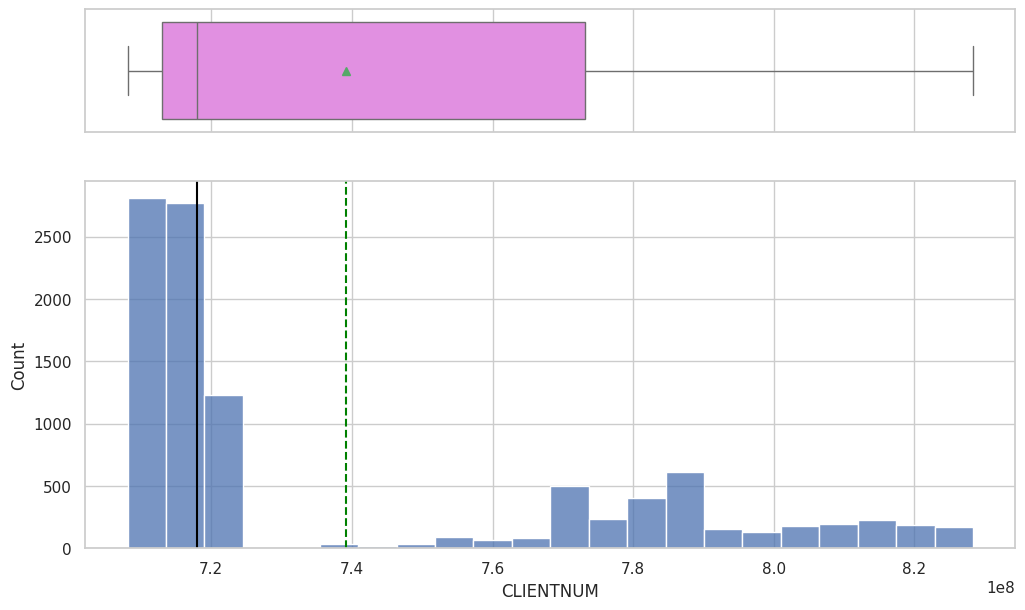

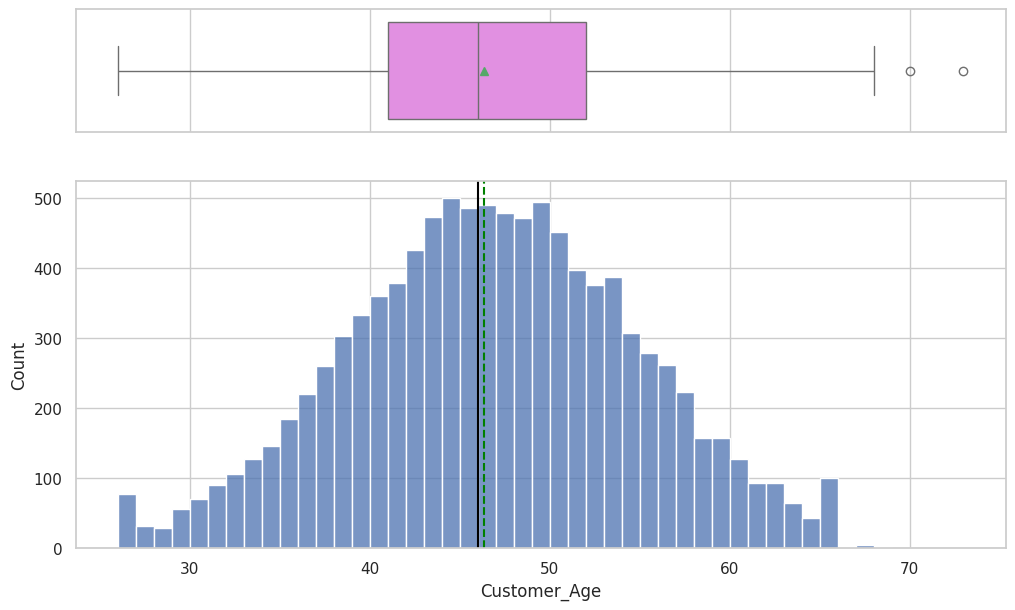

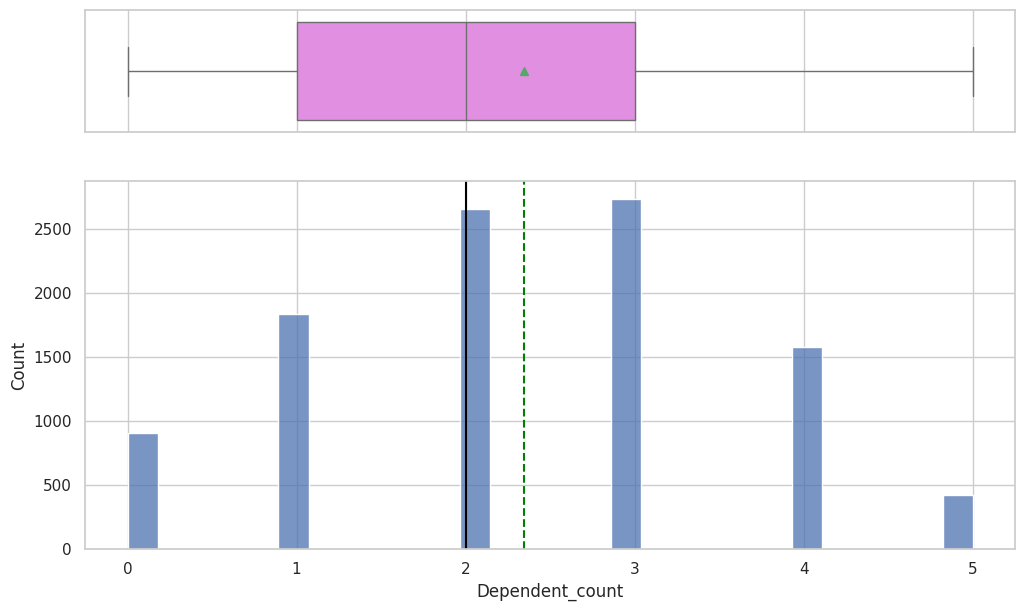

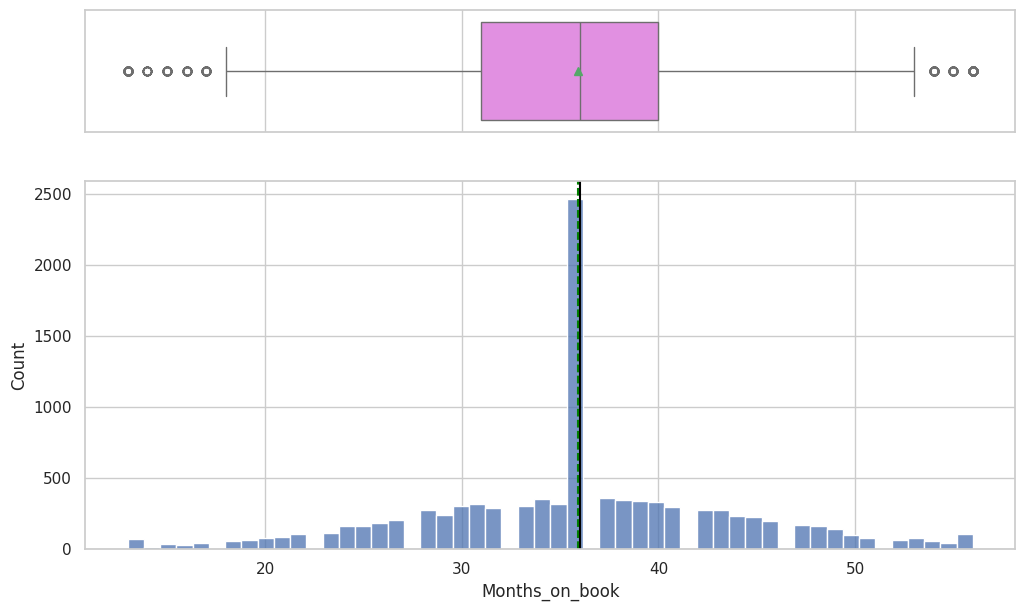

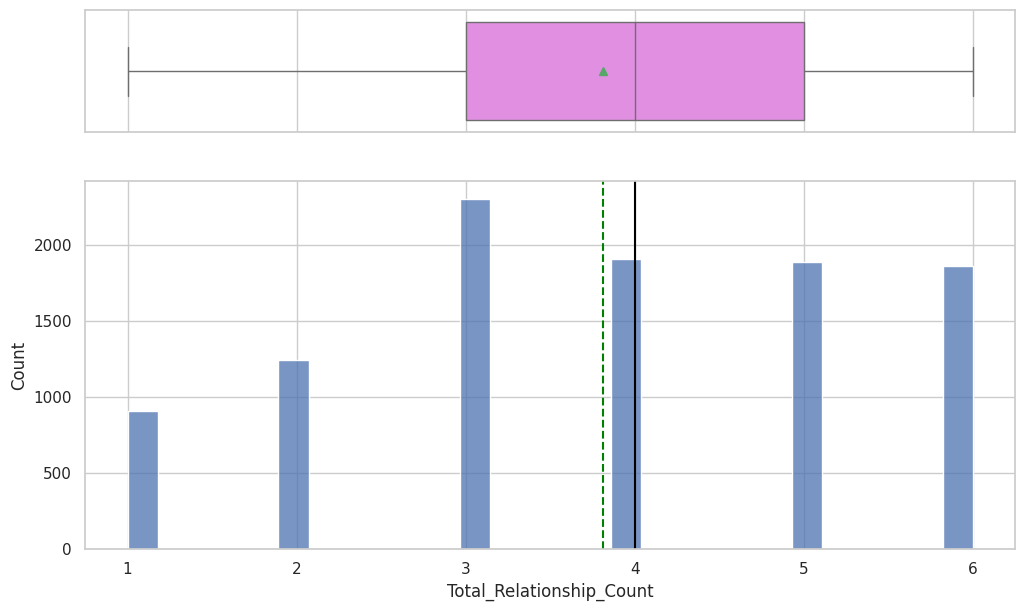

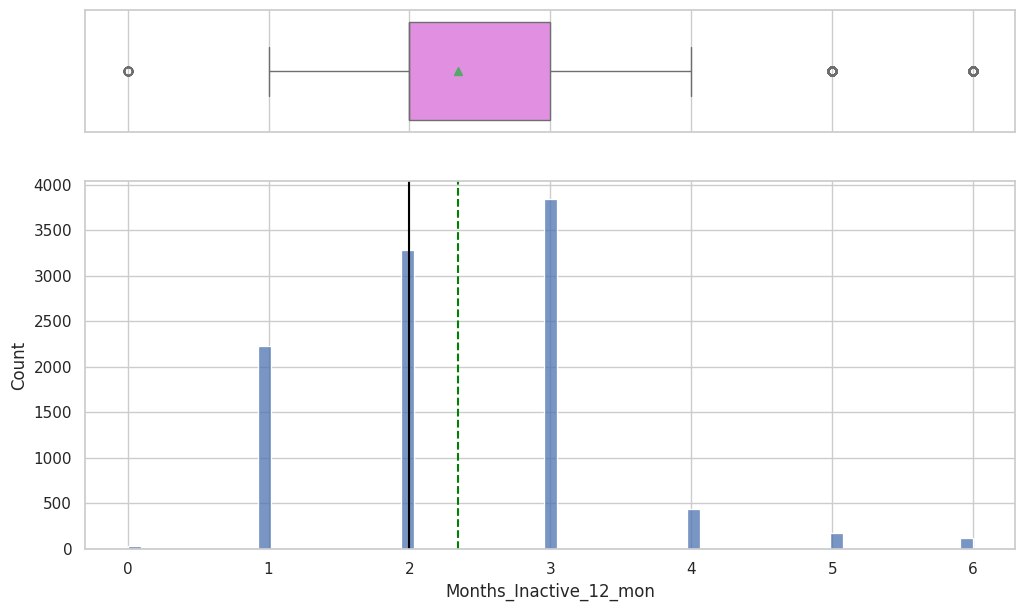

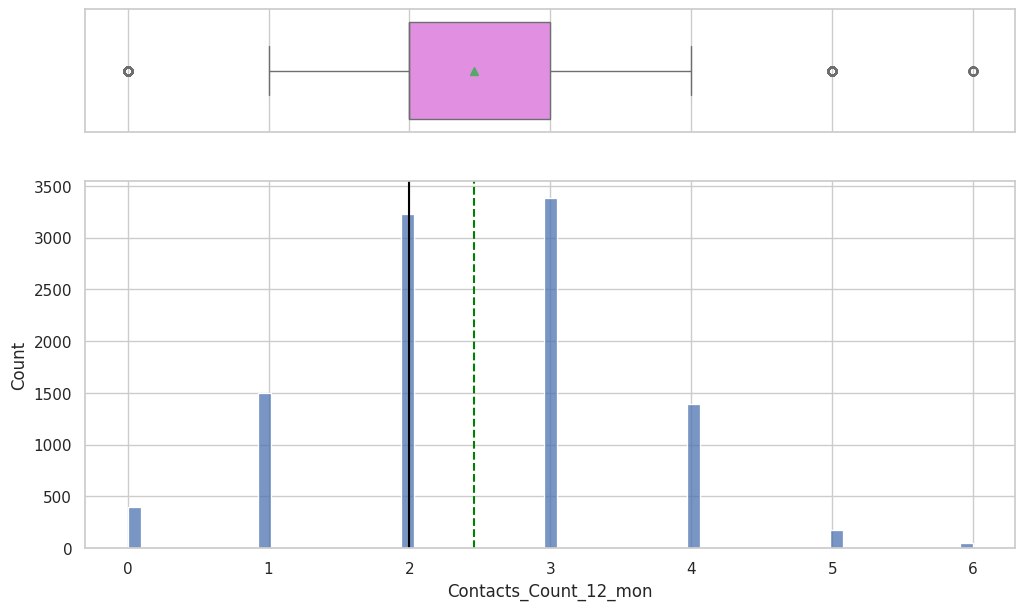

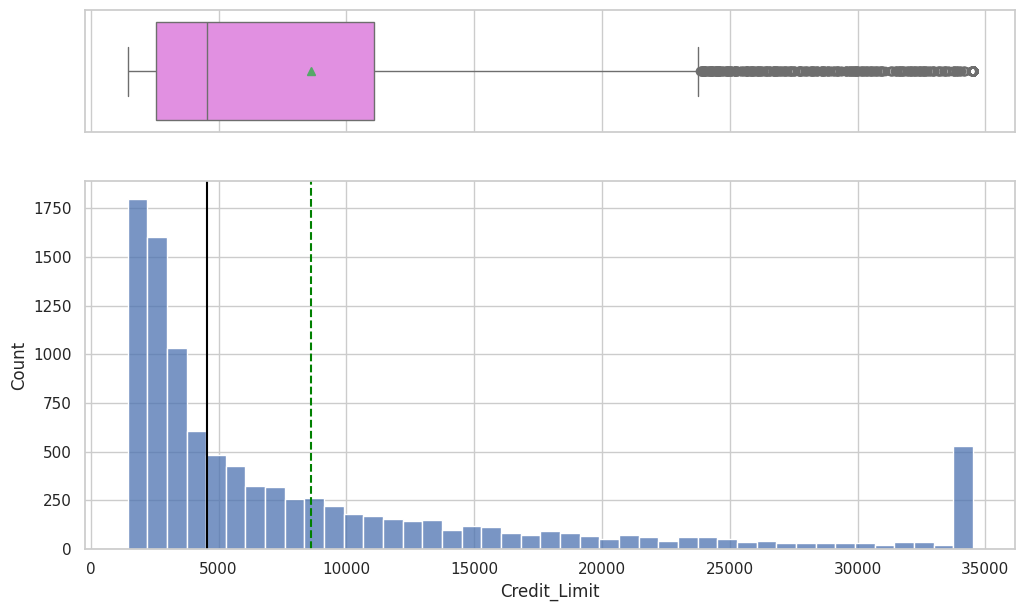

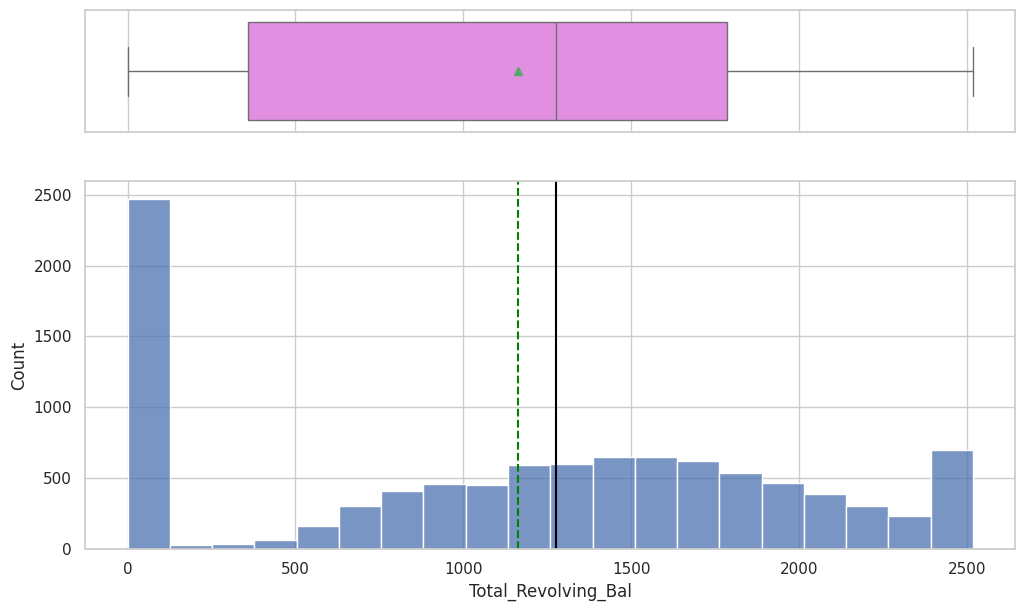

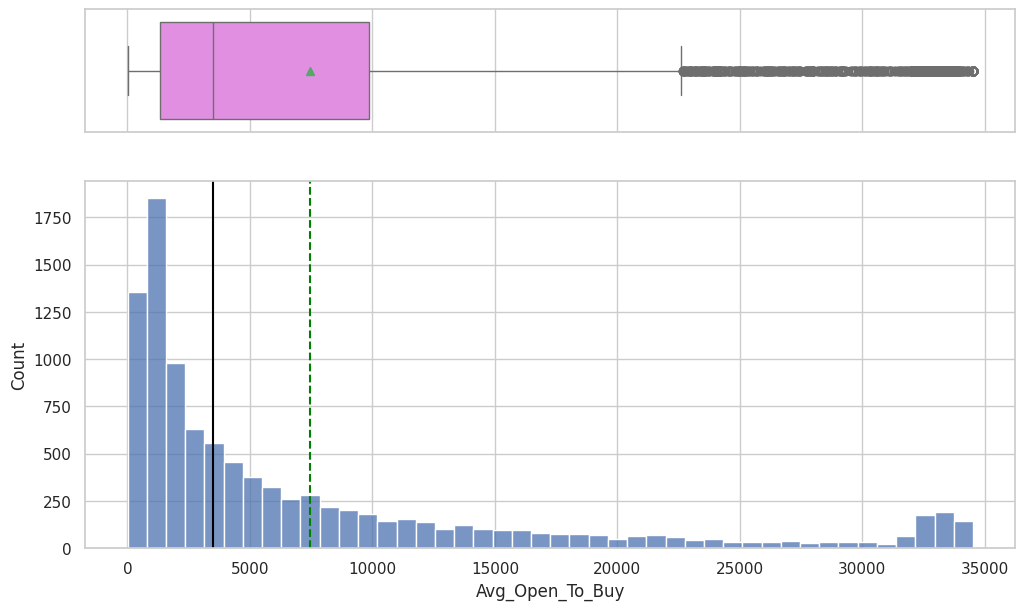

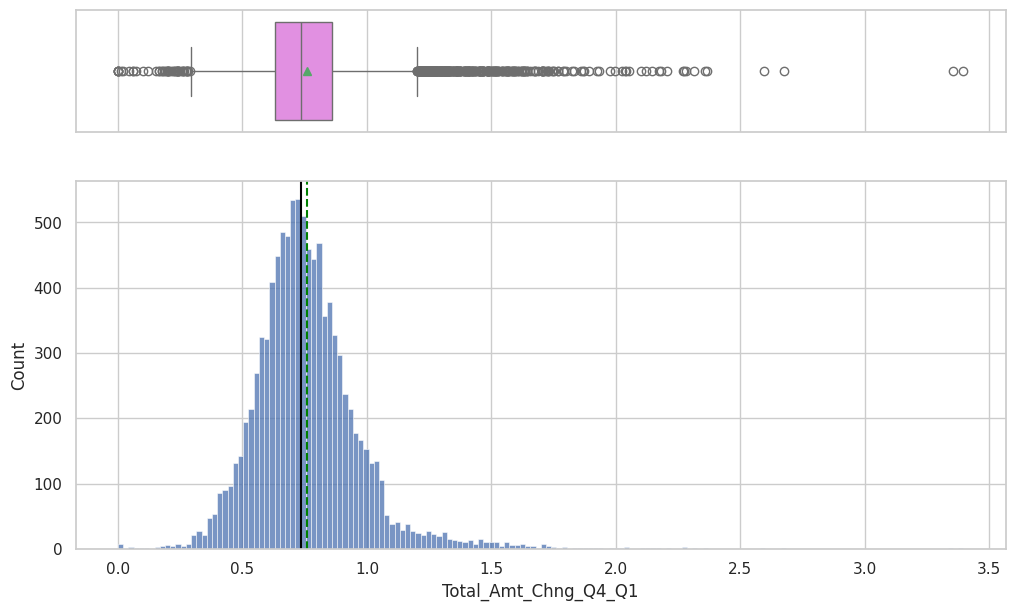

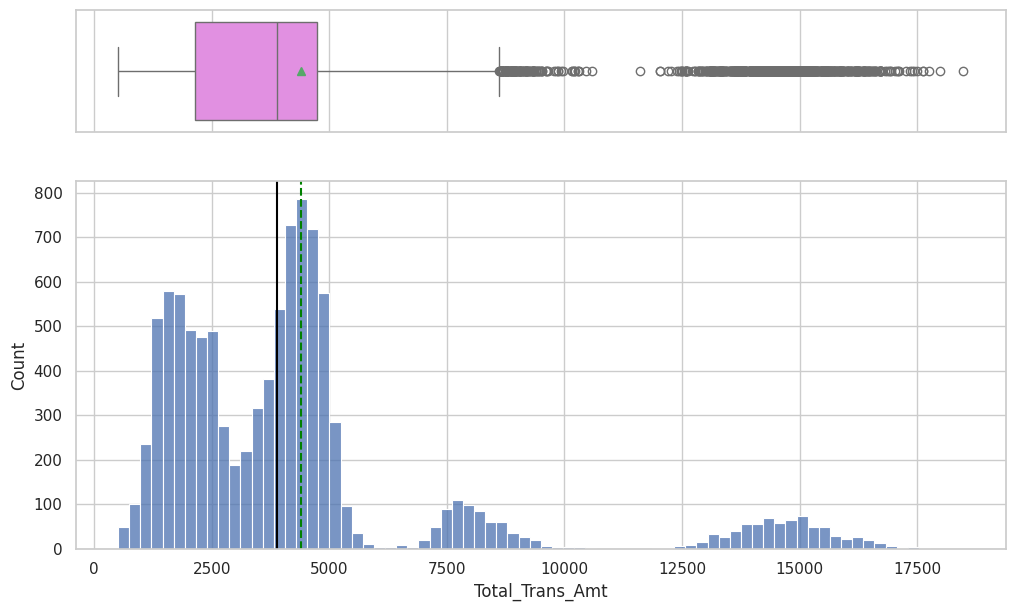

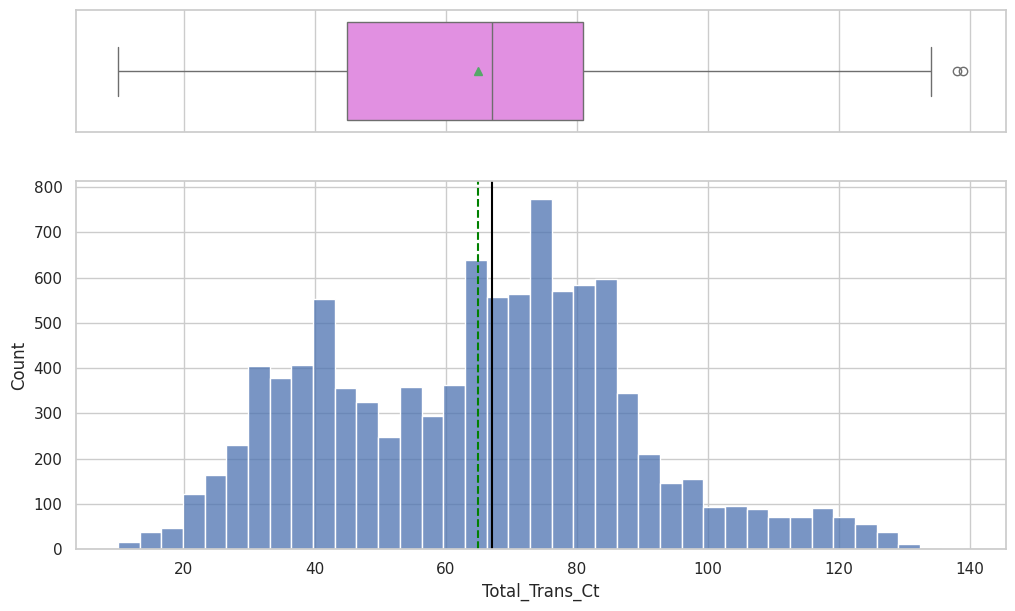

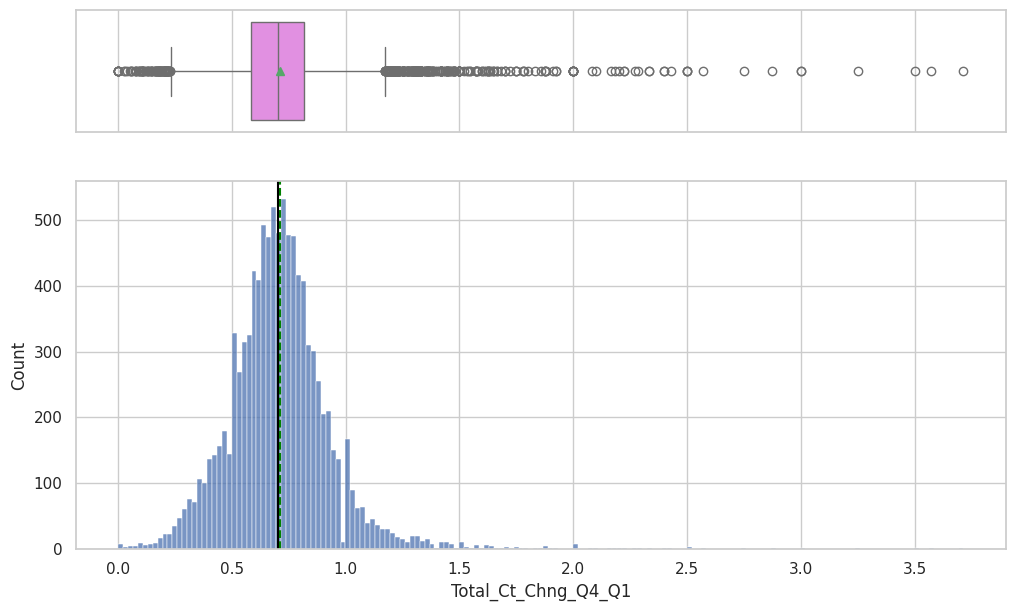

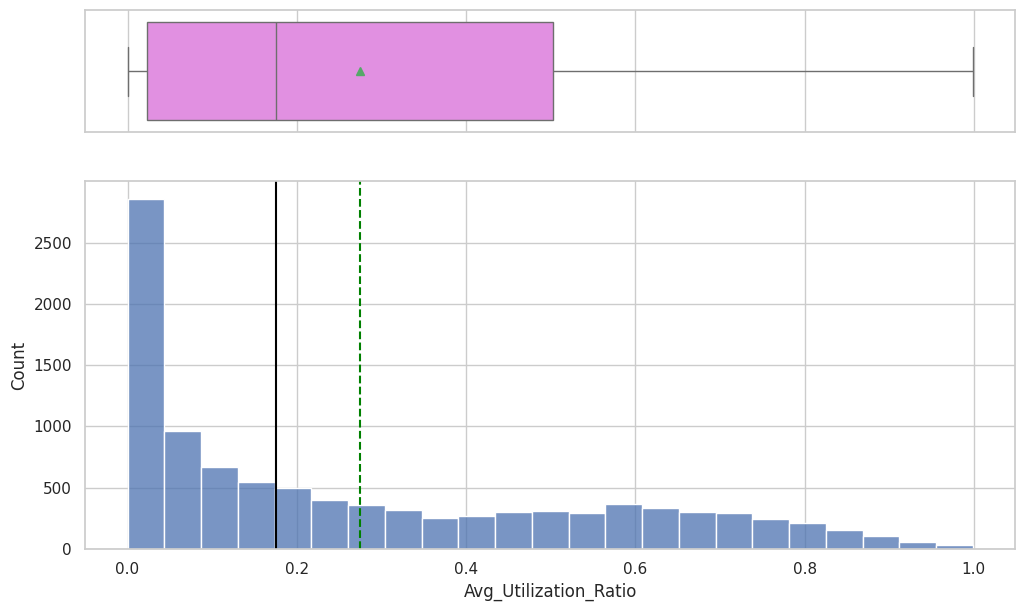

In [ ]:
# Checking the distribution of numerical features
for column in data.select_dtypes(include=['number']).columns:
  histogram_boxplot(data, column)
print()

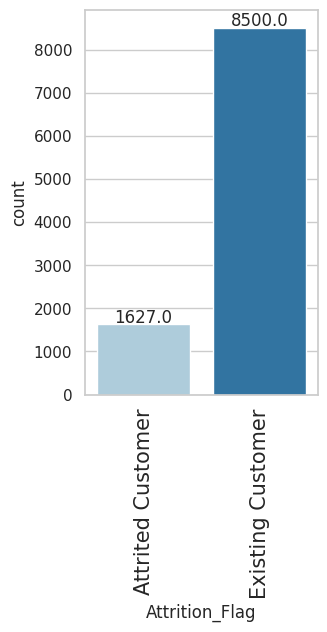

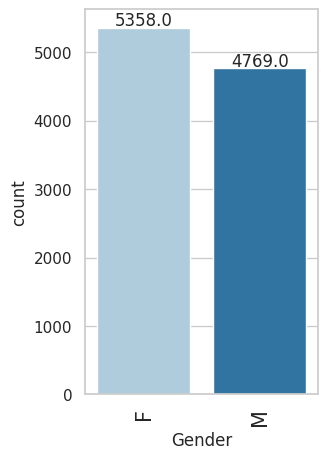

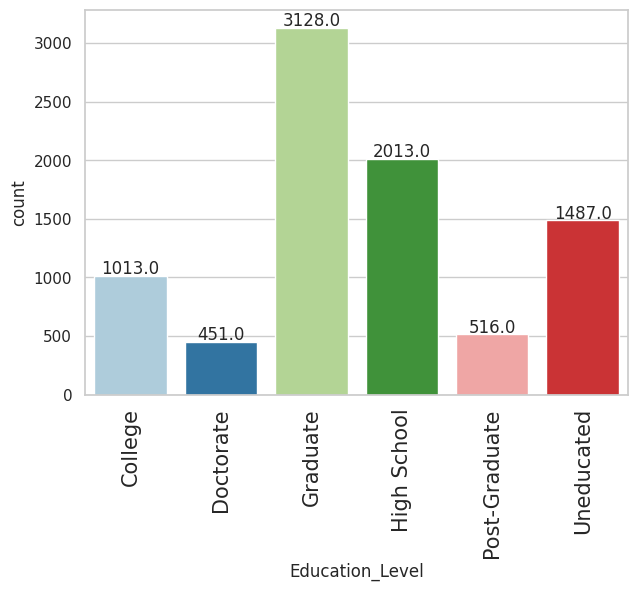

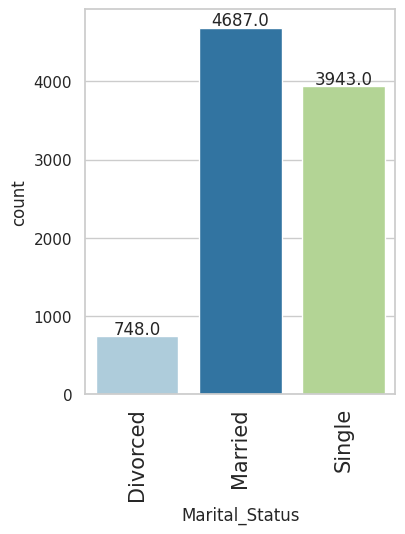

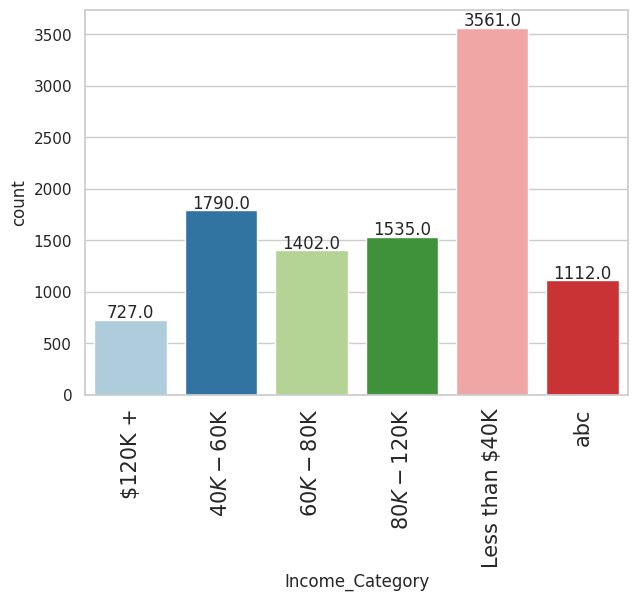

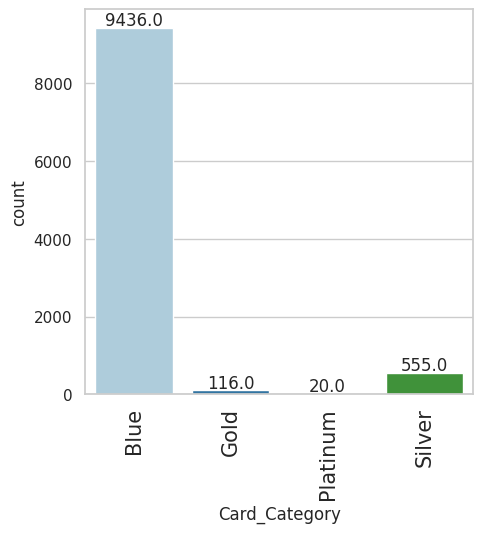

In [ ]:
# Checking the distribution of categorical features
for column in data.select_dtypes(include=['object']).columns:
  labeled_barplot(data, column)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% each for validation and testing


# Reset indices before concatenating
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Combine features and target for training, validation, and test data
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Combine the training, validation, and test datasets
data_encoded = pd.concat([train_data, val_data, test_data], axis=0).reset_index(drop=True)

# Data references
data_encoded.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,NaN,NaN,NaN,3.81258,1.554408,1.0,3.0,4.0,5.0,6.0


## Data Pre-processing

- For the dataset BankChurners.csv, perform Data PreProcessing.  Split the data into training, validation, and test sets.

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
data_processed = data_encoded.copy()

# Separate categorical and numerical features
categorical_features = data_processed.select_dtypes(include=['object']).columns
numerical_features = data_processed.select_dtypes(include=['number']).columns

# Encode categorical features using Label Encoding
le = LabelEncoder()
for feature in categorical_features:
    data_processed[feature] = le.fit_transform(data_processed[feature])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
data_processed[numerical_features] = scaler.fit_transform(data_processed[numerical_features])


# Separate the target variable
y_processed = data_processed['Attrition_Flag']
X_processed = data_processed.drop('Attrition_Flag', axis=1)


# Split the preprocessed data back into training, validation, and test sets
X_train_processed = X_processed.iloc[:len(X_train), :]
X_val_processed = X_processed.iloc[len(X_train):len(X_train)+len(X_val), :]
X_test_processed = X_processed.iloc[len(X_train)+len(X_val):, :]

y_train_processed = y_processed.iloc[:len(y_train)]
y_val_processed = y_processed.iloc[len(y_train):len(y_train)+len(y_val)]
y_test_processed = y_processed.iloc[len(y_train)+len(y_val):]


# Print the shapes of the resulting sets to verify the split
print("X_train_processed shape:", X_train_processed.shape)
print("y_train_processed shape:", y_train_processed.shape)
print("X_val_processed shape:", X_val_processed.shape)
print("y_val_processed shape:", y_val_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)
print("y_test_processed shape:", y_test_processed.shape)

X_train_processed shape: (7088, 20)
y_train_processed shape: (7088,)
X_val_processed shape: (1519, 20)
y_val_processed shape: (1519,)
X_test_processed shape: (1520, 20)
y_test_processed shape: (1520,)


## Missing value imputation




### Need for encoding non-numeric values. Machine learning models require numerical input, so categorical variables need to be converted to numerical form.

In [ ]:
# Encode categorical features using Label Encoding
le = LabelEncoder()
for feature in categorical_features:
    data_processed[feature] = le.fit_transform(data_processed[feature])

### Need for imputing missing values

- Imputing missing values is essential for ensemble methods as it ensures consistency across models, enhances model performance, improves training efficiency, boosts generalization, increases robustness to data imperfections, and allows comprehensive utilization of the data. By addressing missing values,
ensemble methods can function more effectively and provide more accurate and reliable predictions. Impute after splitting data to prevent data leakage

In [ ]:
# Check for missing values in the training set after splitting
print("Missing Values in X_train_processed:\n", X_train_processed.isnull().sum())

# Impute missing values using the mean for numerical features (you can choose other strategies like median or most frequent)
from sklearn.impute import SimpleImputer

numerical_features = X_train_processed.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_train_processed[numerical_features] = imputer.fit_transform(X_train_processed[numerical_features])

# Impute missing values in the validation set using the same imputer (fitted on the training data)
X_val_processed[numerical_features] = imputer.transform(X_val_processed[numerical_features])

# Impute missing values in the test set using the same imputer (fitted on the training data)
X_test_processed[numerical_features] = imputer.transform(X_test_processed[numerical_features])

# Verify if there are still any missing values in the training, validation, and test sets
print("\nMissing Values in X_train_processed (after imputation):\n", X_train_processed.isnull().sum())
print("\nMissing Values in X_val_processed (after imputation):\n", X_val_processed.isnull().sum())
print("\nMissing Values in X_test_processed (after imputation):\n", X_test_processed.isnull().sum())

Missing Values in X_train_processed:
 CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Missing Values in X_train_processed (after imputation):
 CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Co

In [ ]:
data['Income_Category'].value_counts(dropna=False)

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
abc,1112
$120K +,727


In [ ]:
data['Education_Level'].value_counts(dropna=False)

,count
Education_Level,
Graduate,3128
High School,2013
NaN,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [ ]:
data['Marital_Status'].value_counts(dropna=False)

,count
Marital_Status,
Married,4687
Single,3943
NaN,749
Divorced,748


In [ ]:
data['Gender'].value_counts(dropna=False)

,count
Gender,
F,5358
M,4769


In [ ]:
data['Customer_Age'].value_counts(dropna=False)

,count
Customer_Age,
44,500
49,495
46,490
45,486
47,479
43,473
48,472
50,452
42,426


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Initialize the model without tuning

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model without any tuning
model_lr = LogisticRegression(random_state=42)

# Fit the model to the training data
model_lr.fit(X_train_processed, y_train_processed)

# Evaluate the model on the validation set
performance_lr_val = model_performance_classification_sklearn(model_lr, X_val_processed, y_val_processed)
print("Logistic Regression Model Performance (Validation Set):")
print(performance_lr_val)

Logistic Regression Model Performance (Validation Set):
   Accuracy    Recall  Precision        F1
0  0.905201  0.967187   0.923881  0.945038


### Fit the Models and Show recall metrics for the ensembe models above (no tuning)

In [ ]:
# Reload the below libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score

# Initialize ensemble models
model_rf = RandomForestClassifier(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)

# Fit the models
model_rf.fit(X_train_processed, y_train_processed)
model_gb.fit(X_train_processed, y_train_processed)

# Make predictions on the validation set
y_pred_rf = model_rf.predict(X_val_processed)
y_pred_gb = model_gb.predict(X_val_processed)


# Calculate recall for Random Forest
recall_rf = recall_score(y_val_processed, y_pred_rf)
print("Random Forest Recall:", recall_rf)

# Calculate recall for Gradient Boosting
recall_gb = recall_score(y_val_processed, y_pred_gb)
print("Gradient Boosting Recall:", recall_gb)

Random Forest Recall: 0.9875
Gradient Boosting Recall: 0.9875


### Model Building with original data

In [ ]:
# Make predictions on the test data using the trained model
y_pred = model_lr.predict(X_test_processed)

# Map the predicted labels (0 and 1) back to the original labels ('Existing Customer' and 'Attrited Customer')
y_pred_labels = ['Attrited Customer' if pred == 1 else 'Existing Customer' for pred in y_pred]

# Evaluate the model using the original labels for both y_test and y_pred_labels
accuracy = accuracy_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels, pos_label='Attrited Customer')
precision = precision_score(y_test, y_pred_labels, pos_label='Attrited Customer')
f1 = f1_score(y_test, y_pred_labels, pos_label='Attrited Customer')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.1013
Recall: 0.4553
Precision: 0.0871
F1-score: 0.1462


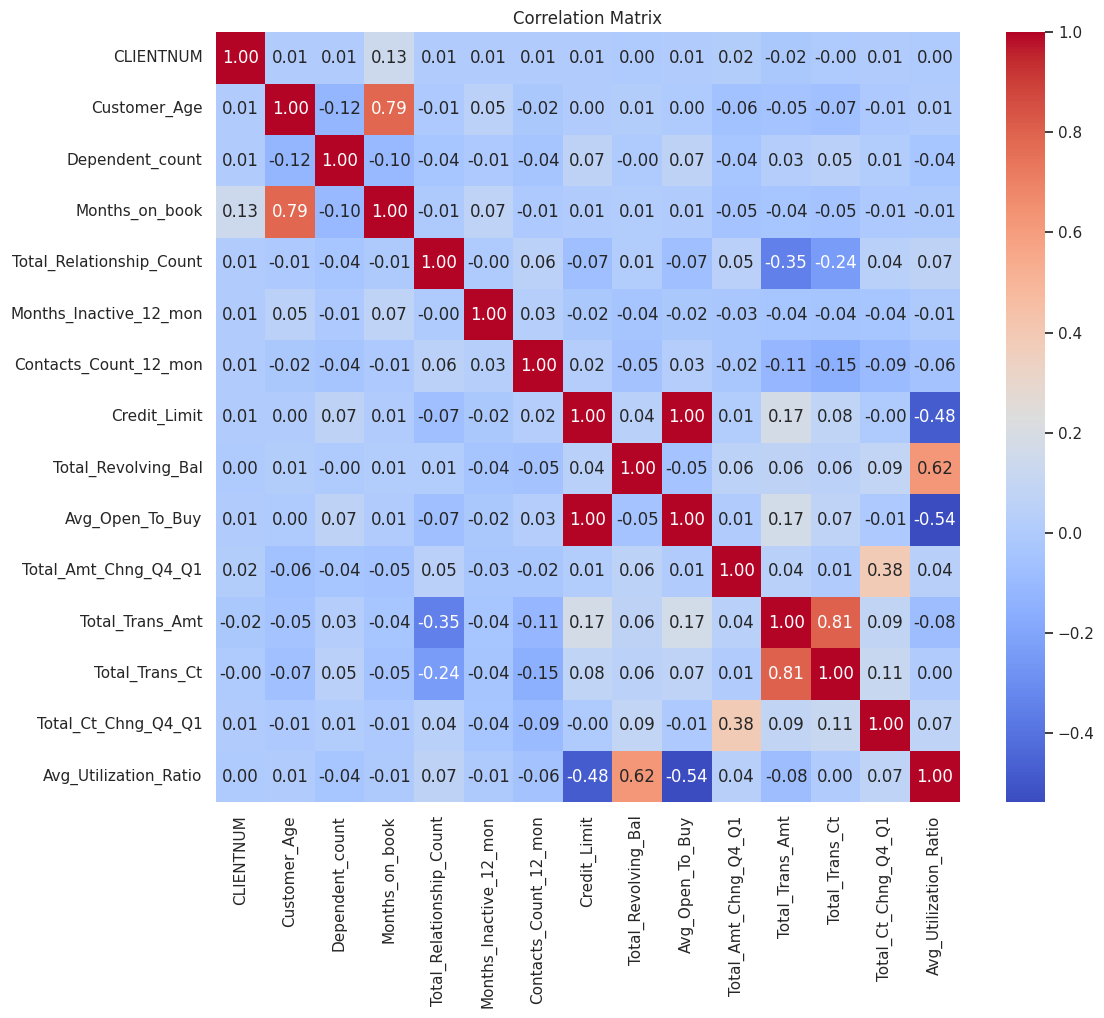

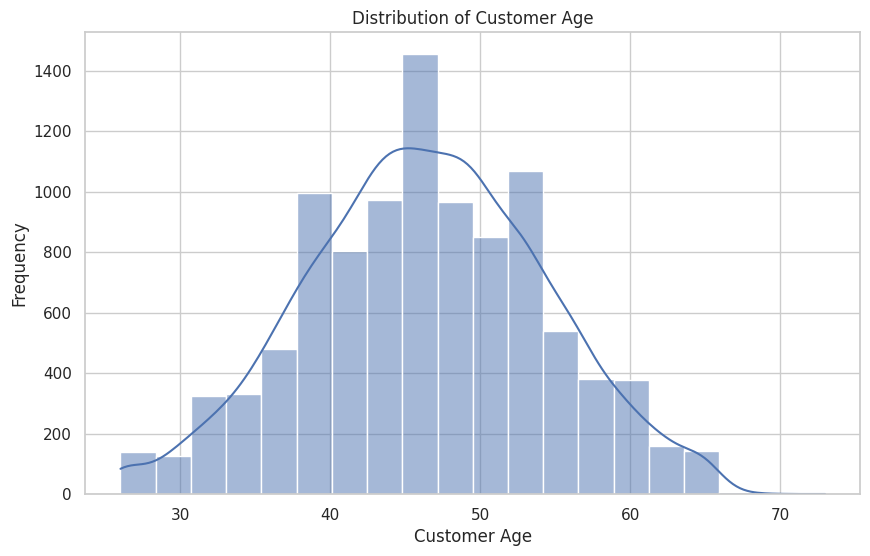

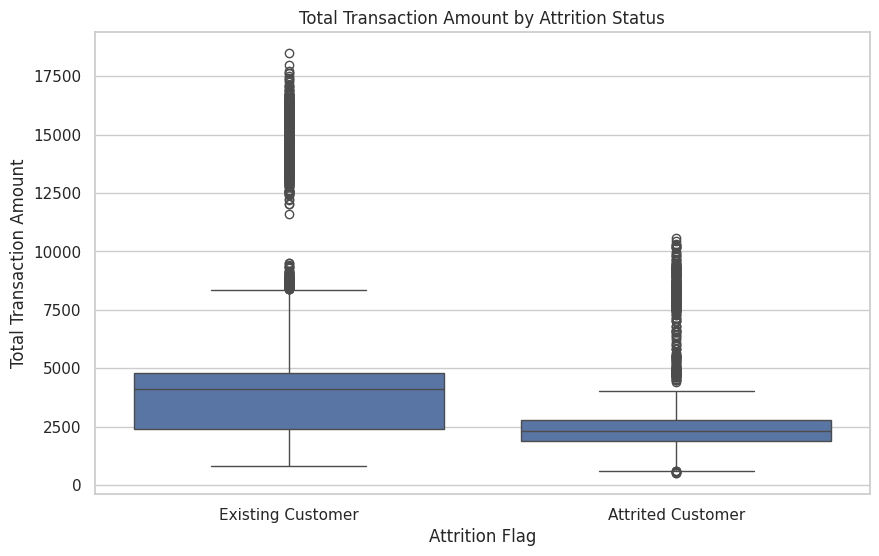

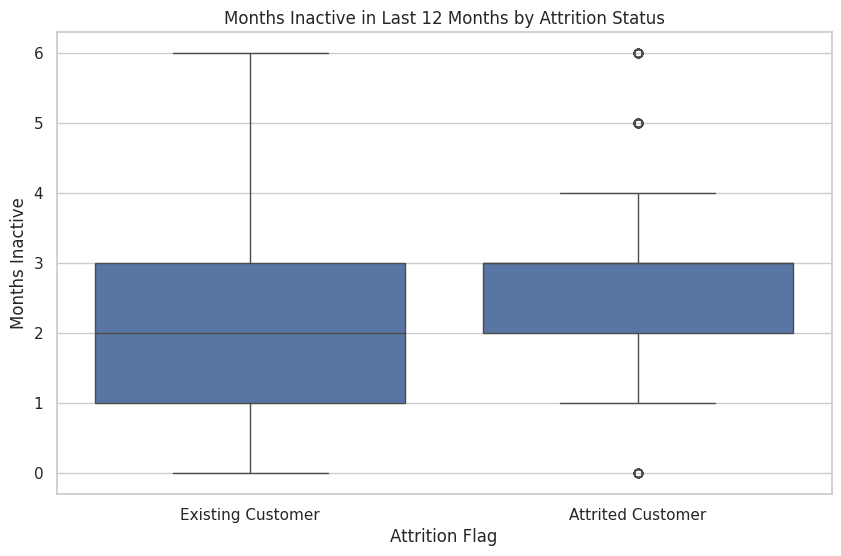

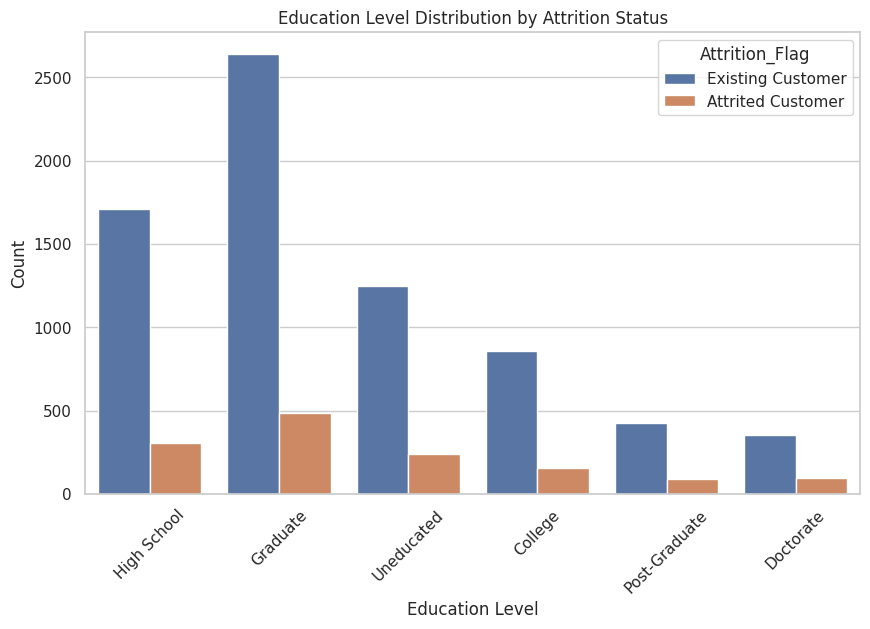

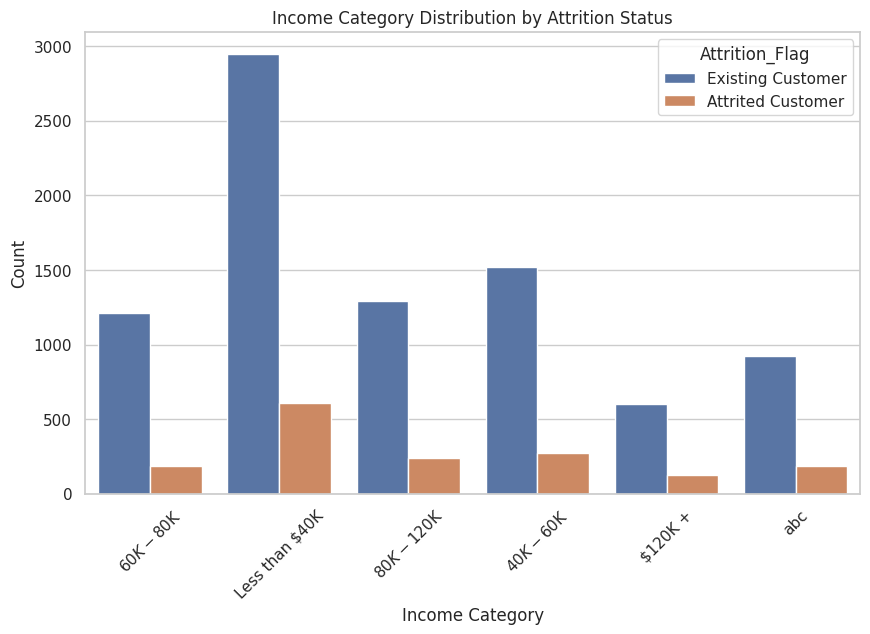

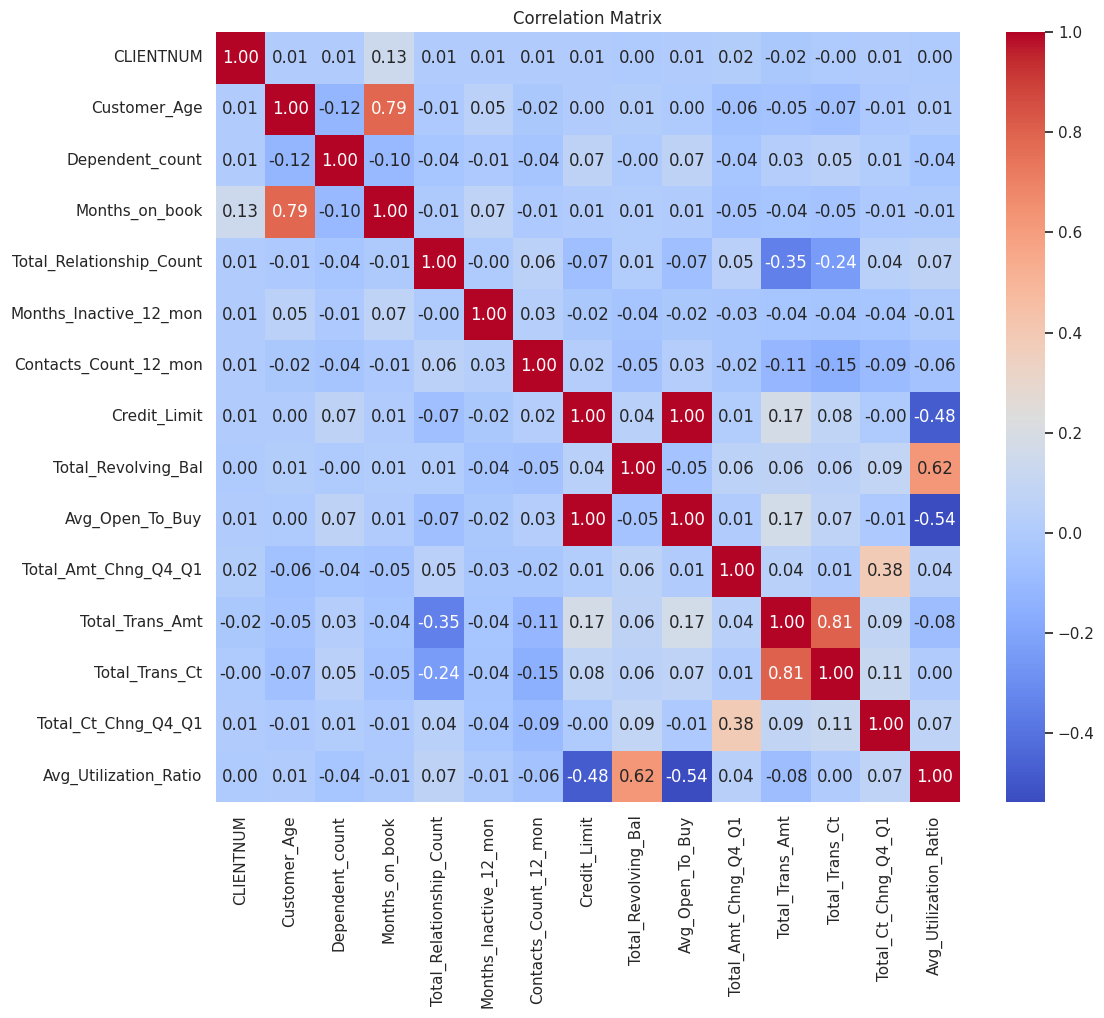

In [ ]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=np.number)

# Visualize the correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of 'Customer_Age'
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], kde=True, bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


# Visualize the relationship between 'Total_Trans_Amt' and 'Attrition_Flag'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=data)
plt.title('Total Transaction Amount by Attrition Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amount')
plt.show()

# Visualize the relationship between 'Months_Inactive_12_mon' and 'Attrition_Flag'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=data)
plt.title('Months Inactive in Last 12 Months by Attrition Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Months Inactive')
plt.show()

# Visualize the distribution of 'Education_Level' for both attrition categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=data)
plt.title('Education Level Distribution by Attrition Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of 'Income_Category' for both attrition categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=data)
plt.title('Income Category Distribution by Attrition Status')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Model Building with Oversampled data

- Oversampling is a technique used to address class imbalance in a dataset. Class imbalance occurs when one class (e.g., "Attrited Customer") has significantly fewer samples than another class (e.g., "Existing Customer"). This can lead to biased models that perform poorly on the minority class.

- SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling method that works by creating synthetic samples of the minority class. It does this by:

- Selecting a minority class sample.
Finding its k-nearest neighbors (samples of the same class).
Randomly selecting one of the neighbors.
Creating a new sample that lies on the line segment between the original sample and the selected neighbor.

- Why oversampling is used in your code:
Your dataset likely has a class imbalance problem, where the "Attrited Customer" class is under-represented compared to the "Existing Customer" class. By using SMOTE, you are creating more samples of the "Attrited Customer" class, which can help improve the performance of your models in predicting churn.

In [ ]:
# Synthetic Minority Over Sampling Technique
!pip install imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd

# Create a list of categorical columns that need to be encoded
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] # Add other categorical columns as needed

# One-hot encode the categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# Apply SMOTE on the encoded data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_encoded, y_train)

The line ```sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1) ```
initializes the SMOTE object with specific parameters:
* ```sampling_strategy=1```: Aims for a 1:1 ratio between the minority and majority classes after oversampling.
* ```k_neighbors=5```: Uses 5 nearest neighbors to generate synthetic samples.
* ```random_state=1```: Ensures reproducibility.

The line ```X_train_over, y_train_over = sm.fit_resample(X_train, y_train)``` applies SMOTE to your training data (X_train, y_train) to generate the oversampled data (X_train_over, y_train_over).

#### Build the model with SMOTE

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train_processed)

# Use X_train_smote and y_train_smote to train your models
model_rf_smote = RandomForestClassifier(random_state=42)
model_rf_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model on the validation set
y_pred_rf_smote = model_rf_smote.predict(X_val_processed)
recall_rf_smote = recall_score(y_val_processed, y_pred_rf_smote)
print("Random Forest (SMOTE) Recall:", recall_rf_smote)

Random Forest (SMOTE) Recall: 0.97265625


#### Store the values in a dictionary, Evaluate initial models, Convert the dictionary to a DataFrame, Identify the maximum recall scores on the test and validation sets, Apply conditional formatting to highlight rows with both maximum test and validation recall scores


In [ ]:
# Store the values in a dictionary, Evaluate initial models, Convert the dictionary to a DataFrame,
# Identify the maximum recall scores on the test and validation sets,
# Apply conditional formatting to highlight rows with both maximum test and validation recall scores

# Create a dictionary to store model performance metrics
model_results = {
    'Model': [],
    'Validation Recall': [],
    'Test Recall': []
}

# Evaluate Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_processed, y_train_processed)

y_pred_lr_val = model_lr.predict(X_val_processed)
y_pred_lr_test = model_lr.predict(X_test_processed)

recall_lr_val = recall_score(y_val_processed, y_pred_lr_val)
recall_lr_test = recall_score(y_test_processed, y_pred_lr_test)

model_results['Model'].append('Logistic Regression')
model_results['Validation Recall'].append(recall_lr_val)
model_results['Test Recall'].append(recall_lr_test)

# Evaluate Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_processed, y_train_processed)

y_pred_rf_val = model_rf.predict(X_val_processed)
y_pred_rf_test = model_rf.predict(X_test_processed)

recall_rf_val = recall_score(y_val_processed, y_pred_rf_val)
recall_rf_test = recall_score(y_test_processed, y_pred_rf_test)

model_results['Model'].append('Random Forest')
model_results['Validation Recall'].append(recall_rf_val)
model_results['Test Recall'].append(recall_rf_test)

# Evaluate Gradient Boosting model
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_processed, y_train_processed)

y_pred_gb_val = model_gb.predict(X_val_processed)
y_pred_gb_test = model_gb.predict(X_test_processed)

recall_gb_val = recall_score(y_val_processed, y_pred_gb_val)
recall_gb_test = recall_score(y_test_processed, y_pred_gb_test)

model_results['Model'].append('Gradient Boosting')
model_results['Validation Recall'].append(recall_gb_val)
model_results['Test Recall'].append(recall_gb_test)


# Evaluate Random Forest with SMOTE model
model_rf_smote = RandomForestClassifier(random_state=42)
model_rf_smote.fit(X_train_smote, y_train_smote)

y_pred_rf_smote_val = model_rf_smote.predict(X_val_processed)
y_pred_rf_smote_test = model_rf_smote.predict(X_test_processed)

recall_rf_smote_val = recall_score(y_val_processed, y_pred_rf_smote_val)
recall_rf_smote_test = recall_score(y_test_processed, y_pred_rf_smote_test)

model_results['Model'].append('Random Forest (SMOTE)')
model_results['Validation Recall'].append(recall_rf_smote_val)
model_results['Test Recall'].append(recall_rf_smote_test)

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(model_results)

# Find the maximum recall scores for test and validation sets
max_val_recall = df_results['Validation Recall'].max()
max_test_recall = df_results['Test Recall'].max()

# Apply conditional formatting to highlight rows with both maximum test and validation recall scores
def highlight_max_recall(row):
  if row['Validation Recall'] == max_val_recall and row['Test Recall'] == max_test_recall:
    return ['background-color: yellow'] * len(row)
  else:
    return [''] * len(row)


styled_df = df_results.style.apply(highlight_max_recall, axis=1)

# Display the DataFrame
display(styled_df)

,Model,Validation Recall,Test Recall
0,Logistic Regression,0.967187,0.970705
1,Random Forest,0.987500,0.988915
2,Gradient Boosting,0.987500,0.990499
3,Random Forest (SMOTE),0.972656,0.981789


### Model Building with Undersampled data

- Import Random Sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

# Resample the training data
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# Apply RandomUnderSampler to the training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_processed, y_train_processed)

# Use X_train_rus and y_train_rus to train your models
model_rf_rus = RandomForestClassifier(random_state=42)
model_rf_rus.fit(X_train_rus, y_train_rus)

# Evaluate the model on the validation set
y_pred_rf_rus = model_rf_rus.predict(X_val_processed)
recall_rf_rus = recall_score(y_val_processed, y_pred_rf_rus)
print("Random Forest (RUS) Recall:", recall_rf_rus)


# Add the results to your model_results dictionary
model_results['Model'].append('Random Forest (RUS)')
model_results['Validation Recall'].append(recall_rf_rus)

# Predict on the test set and calculate the recall
y_pred_rf_rus_test = model_rf_rus.predict(X_test_processed)
recall_rf_rus_test = recall_score(y_test_processed, y_pred_rf_rus_test)
model_results['Test Recall'].append(recall_rf_rus_test)

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(model_results)

# Find the maximum recall scores for test and validation sets
max_val_recall = df_results['Validation Recall'].max()
max_test_recall = df_results['Test Recall'].max()

# Apply conditional formatting to highlight rows with both maximum test and validation recall scores
def highlight_max_recall(row):
  if row['Validation Recall'] == max_val_recall and row['Test Recall'] == max_test_recall:
    return ['background-color: yellow'] * len(row)
  else:
    return [''] * len(row)


styled_df = df_results.style.apply(highlight_max_recall, axis=1)

# Display the DataFrame
display(styled_df)

Random Forest (RUS) Recall: 0.91640625


,Model,Validation Recall,Test Recall
0,Logistic Regression,0.967187,0.970705
1,Random Forest,0.987500,0.988915
2,Gradient Boosting,0.987500,0.990499
3,Random Forest (SMOTE),0.972656,0.981789
4,Random Forest (RUS),0.916406,0.935075


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


#### Tuning method for Decision tree with original data

- Import accuracy_score.
- Define scorer: The scorer variable using make_scorer and passing accuracy_score to it.
- This creates a callable scorer object that RandomizedSearchCV can use to evaluate the model's performance.
- Replace accuracy_score with any other appropriate metric like precision_score, recall_score, f1_score, etc. from sklearn.metrics

In [ ]:
# Import the necessary class from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Import necessary modules for scoring and model selection
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Define the scoring function using make_scorer with accuracy_score
scorer = make_scorer(accuracy_score)  # Assigning accuracy_score to scorer

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Import LabelEncoder for encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through all columns of X_train
for col in X_train.columns:
    # Check if the column contains any string values
    if X_train[col].dtype == 'object':
        # Fit the encoder to the unique values in the column and transform the column
        X_train[col] = encoder.fit_transform(X_train[col])

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9295994736491107:


#### Tuning method for Decision tree with oversampled data

In [ ]:
# Defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2, 6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes': [10, 15],
              'min_impurity_decrease': [0.0001, 0.001]}

# Define the scoring function using make_scorer with accuracy_score
scorer = make_scorer(accuracy_score)  # Assigning accuracy_score to scorer

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, scoring=scorer,
                                   cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_smote, y_train_smote)

print("Best parameters are {} with CV score={}:"
      .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9127084057836206:


#### Tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Convert categorical features in X_train_un to numerical using Label Encoding or One-Hot Encoding
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through all columns of X_train_un
for col in X_train_un.columns:
    # Check if the column contains any string values
    if X_train_un[col].dtype == 'object':
        # Fit the encoder to the unique values in the column and transform the column
        X_train_un[col] = encoder.fit_transform(X_train_un[col])


#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8952265135087616:


## Model Comparison and Final Model Selection

In [ ]:
# Create a dictionary to store model performance metrics
model_results = {
    'Model': [],
    'Validation Recall': [],
    'Test Recall': []
}

# Evaluate Random Forest with RUS model (if you have trained it)
if 'model_rf_rus' in locals():
    y_pred_rf_rus_val = model_rf_rus.predict(X_val_processed)
    y_pred_rf_rus_test = model_rf_rus.predict(X_test_processed)

    recall_rf_rus_val = recall_score(y_val_processed, y_pred_rf_rus_val)
    recall_rf_rus_test = recall_score(y_test_processed, y_pred_rf_rus_test)

    model_results['Model'].append('Random Forest (RUS)')
    model_results['Validation Recall'].append(recall_rf_rus_val)
    model_results['Test Recall'].append(recall_rf_rus_test)


# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(model_results)

# Find the maximum recall scores for test and validation sets
max_val_recall = df_results['Validation Recall'].max()
max_test_recall = df_results['Test Recall'].max()


# Apply conditional formatting to highlight rows with both maximum test and validation recall scores
def highlight_max_recall(row):
  if row['Validation Recall'] == max_val_recall and row['Test Recall'] == max_test_recall:
    return ['background-color: yellow'] * len(row)
  else:
    return [''] * len(row)


styled_df = df_results.style.apply(highlight_max_recall, axis=1)

# Display the styled DataFrame
display(styled_df)

# Select the final model based on the results (e.g., the model with the highest recall on the test set)
final_model = None  # Replace with your selected model

# Select the model with the highest test recall
best_test_recall_index = df_results['Test Recall'].idxmax()
final_model_name = df_results.loc[best_test_recall_index, 'Model']

if final_model_name == 'Logistic Regression':
  final_model = model_lr
elif final_model_name == 'Random Forest':
  final_model = model_rf
elif final_model_name == 'Gradient Boosting':
  final_model = model_gb
elif final_model_name == 'Random Forest (SMOTE)':
  final_model = model_rf_smote
elif final_model_name == 'Random Forest (RUS)':
  final_model = model_rf_rus

print(f"The final selected model is: {final_model_name}")

,Model,Validation Recall,Test Recall
0,Random Forest (RUS),0.916406,0.935075


The final selected model is: Random Forest (RUS)


#### Use this final model for prediction on new data.

### Test set final performance

In [ ]:
# Final model (final_model) already trained: X_test_processed; y_test_processed
y_pred_final = final_model.predict(X_test_processed)

accuracy_final = accuracy_score(y_test_processed, y_pred_final)
recall_final = recall_score(y_test_processed, y_pred_final)
precision_final = precision_score(y_test_processed, y_pred_final)
f1_final = f1_score(y_test_processed, y_pred_final)

print("Final Model Performance on Test Set:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"F1-score: {f1_final:.4f}")

# Print the confusion matrix for a more detailed analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test_processed, y_pred_final))

Final Model Performance on Test Set:
Accuracy: 0.9375
Recall: 0.9351
Precision: 0.9891
F1-score: 0.9613
Confusion Matrix:
[[ 244   13]
 [  82 1181]]


,Model,Validation Recall,Test Recall
0,Random Forest (RUS),0.916406,0.935075


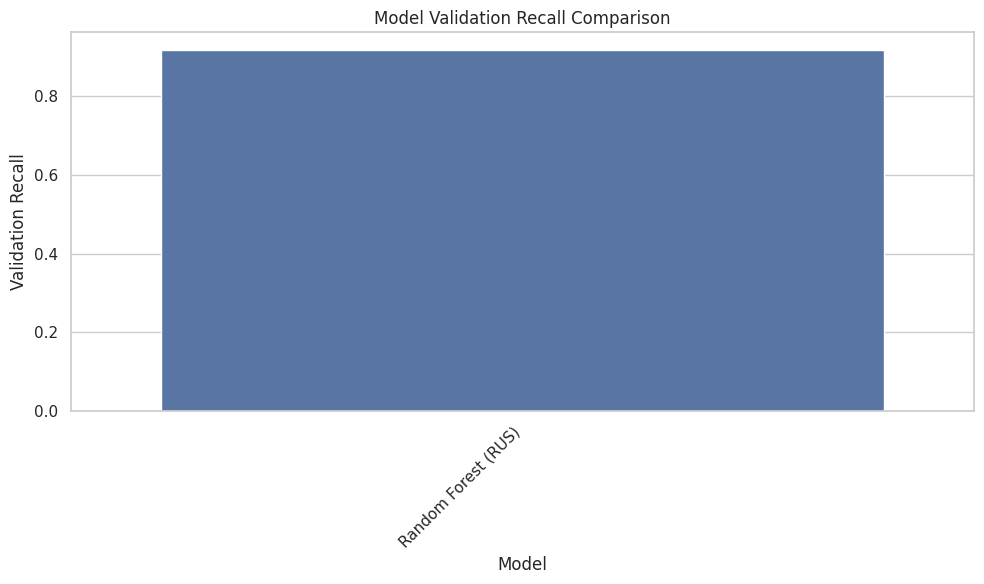

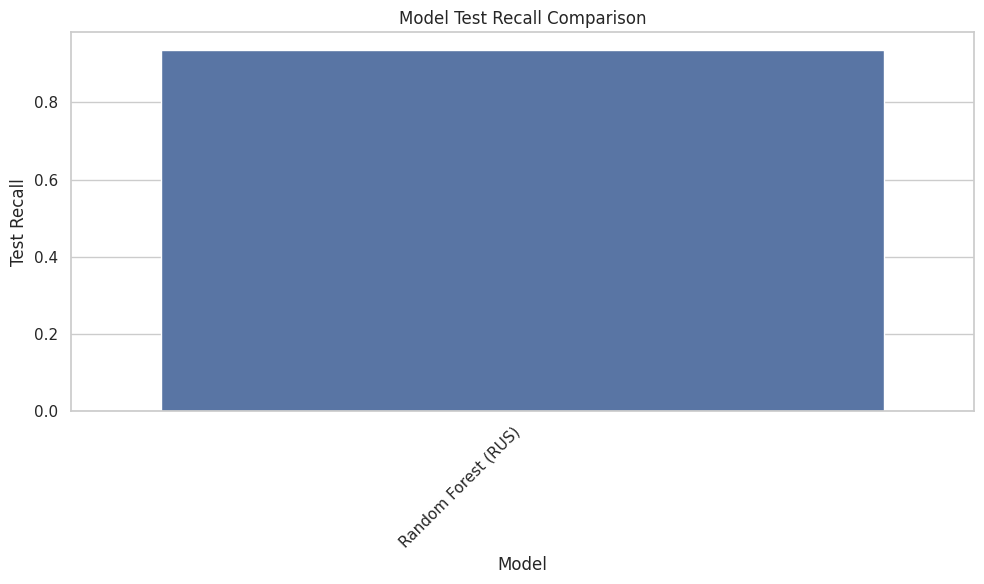

In [ ]:
# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(model_results)

# Find the maximum recall scores for test and validation sets
max_val_recall = df_results['Validation Recall'].max()
max_test_recall = df_results['Test Recall'].max()

# Apply conditional formatting to highlight rows with both maximum test and validation recall scores
def highlight_max_recall(row):
  if row['Validation Recall'] == max_val_recall and row['Test Recall'] == max_test_recall:
    return ['background-color: yellow'] * len(row)
  else:
    return [''] * len(row)


styled_df = df_results.style.apply(highlight_max_recall, axis=1)

# Display the styled DataFrame
display(styled_df)

# Create a bar plot to compare model recall scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Validation Recall', data=df_results)
plt.title('Model Validation Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Recall')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot to compare model recall scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Recall', data=df_results)
plt.title('Model Test Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Test Recall')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Business Insights and Conclusions

### Business Insights:

Churn Problem: The analysis confirms that Thera Bank has a significant customer churn problem. This is evident from the initial data overview and visualizations, which highlight the proportion of attrited customers.

Predictive Modeling: Machine learning models, particularly ensemble methods like Random Forest and Gradient Boosting, show promising potential in predicting customer churn. These models, when trained and tuned appropriately, can identify customers at high risk of attrition.

Data Imbalance: The dataset has a class imbalance issue, with a higher proportion of existing customers compared to attrited customers. Techniques like SMOTE and RandomUnderSampler are employed to address this imbalance, leading to better model performance.

Feature Importance: Analyzing feature importance from trained models can reveal the key factors influencing customer churn. These insights can guide the bank in understanding customer behavior and developing targeted retention strategies.

Model Evaluation: Evaluating models using metrics like recall, accuracy, precision, and F1-score helps in assessing their effectiveness. The analysis focuses on optimizing recall to minimize false negatives and accurately identify customers likely to churn.

### Business Conclusions:

Proactive Intervention: By implementing the trained models, Thera Bank can proactively identify and target high-risk customers with personalized retention offers and services.

Service Improvement: Insights gained from feature importance analysis can help the bank identify areas for service improvement to reduce customer dissatisfaction and churn.

Resource Optimization: By accurately predicting churn, the bank can optimize resource allocation for retention efforts, focusing on customers most likely to respond positively.

Profitability: Reducing customer churn leads to increased profitability by retaining valuable customers and minimizing revenue loss.

Customer Relationship Management: The analysis emphasizes the importance of effective customer relationship management in understanding customer needs and preventing churn.

Overall Conclusion:

Predictive modeling using machine learning can significantly aid Thera Bank in addressing its customer churn problem. By implementing these models and leveraging the insights derived from the analysis, the bank can improve customer retention, optimize resources, and enhance profitability.